In [10]:
#%pip install pandas matplotlib seaborn plotly scikit-learn seaborn missingno

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
from IPython.display import display, HTML
import missingno as mn
import seaborn as sns
sns.set()

In [3]:
#Интерактивные графики в отдельном окне
%matplotlib tk

In [4]:
%matplotlib inline

In [5]:
RANDOM_SEED = 42


Загрузка данных

In [6]:
df = pd.read_csv("autos.csv")

### Проверим типы данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

### Проверим  дубликаты

In [8]:
if df.duplicated().sum():
    df = df.drop_duplicates()
    df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354365 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354365 non-null  object
 1   Price              354365 non-null  int64 
 2   VehicleType        316875 non-null  object
 3   RegistrationYear   354365 non-null  int64 
 4   Gearbox            334532 non-null  object
 5   Power              354365 non-null  int64 
 6   Model              334660 non-null  object
 7   Kilometer          354365 non-null  int64 
 8   RegistrationMonth  354365 non-null  int64 
 9   FuelType           321470 non-null  object
 10  Brand              354365 non-null  object
 11  Repaired           283211 non-null  object
 12  DateCreated        354365 non-null  object
 13  NumberOfPictures   354365 non-null  int64 
 14  PostalCode         354365 non-null  int64 
 15  LastSeen           354365 non-null  object
dtypes: int64(7), object(9)
me

In [10]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


* Преобразование данных

Начнем с даты.

In [11]:
df["DateCrawled"] = pd.to_datetime(df.DateCrawled)
df["DateCreated"] = pd.to_datetime(df.DateCreated)
df["LastSeen"] = pd.to_datetime(df.LastSeen)
df["RegistrationYear"] = pd.to_datetime(df.RegistrationYear)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354365 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354365 non-null  datetime64[ns]
 1   Price              354365 non-null  int64         
 2   VehicleType        316875 non-null  object        
 3   RegistrationYear   354365 non-null  datetime64[ns]
 4   Gearbox            334532 non-null  object        
 5   Power              354365 non-null  int64         
 6   Model              334660 non-null  object        
 7   Kilometer          354365 non-null  int64         
 8   RegistrationMonth  354365 non-null  int64         
 9   FuelType           321470 non-null  object        
 10  Brand              354365 non-null  object        
 11  Repaired           283211 non-null  object        
 12  DateCreated        354365 non-null  datetime64[ns]
 13  NumberOfPictures   354365 non-null  int64        

In [12]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
DateCrawled,354365,2016-03-21 12:58:09.520460544,2016-03-05 14:06:22,2016-03-13 11:52:33,2016-03-21 17:50:55,2016-03-29 14:37:20,2016-04-07 14:36:58,NaN
Price,354365.0,4416.67983,0.0,1050.0,2700.0,6400.0,20000.0,4514.176349
RegistrationYear,354365,1970-01-01 00:00:00.000002004,1970-01-01 00:00:00.000001,1970-01-01 00:00:00.000001999,1970-01-01 00:00:00.000002003,1970-01-01 00:00:00.000002008,1970-01-01 00:00:00.000009999,NaN
Power,354365.0,110.093816,0.0,69.0,105.0,143.0,20000.0,189.85133
Kilometer,354365.0,128211.363989,5000.0,125000.0,150000.0,150000.0,150000.0,37905.083858
RegistrationMonth,354365.0,5.71465,0.0,3.0,6.0,9.0,12.0,3.726432
DateCreated,354365,2016-03-20 19:12:06.583042560,2014-03-10 00:00:00,2016-03-13 00:00:00,2016-03-21 00:00:00,2016-03-29 00:00:00,2016-04-07 00:00:00,NaN
NumberOfPictures,354365.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PostalCode,354365.0,50508.5038,1067.0,30165.0,49413.0,71083.0,99998.0,25783.100078
LastSeen,354365,2016-03-29 23:51:06.766184960,2016-03-05 14:15:08,2016-03-23 02:50:03,2016-04-03 15:15:52,2016-04-06 10:15:19,2016-04-07 14:58:51,NaN


In [13]:
categorical_cols = ["VehicleType", "Gearbox", "FuelType", "Brand", "Model", "Repaired"]

 Изменим тип на категории и проверим количество пустых

In [14]:
for category in categorical_cols:
    df[category] = df[category].astype("category")


<Axes: >

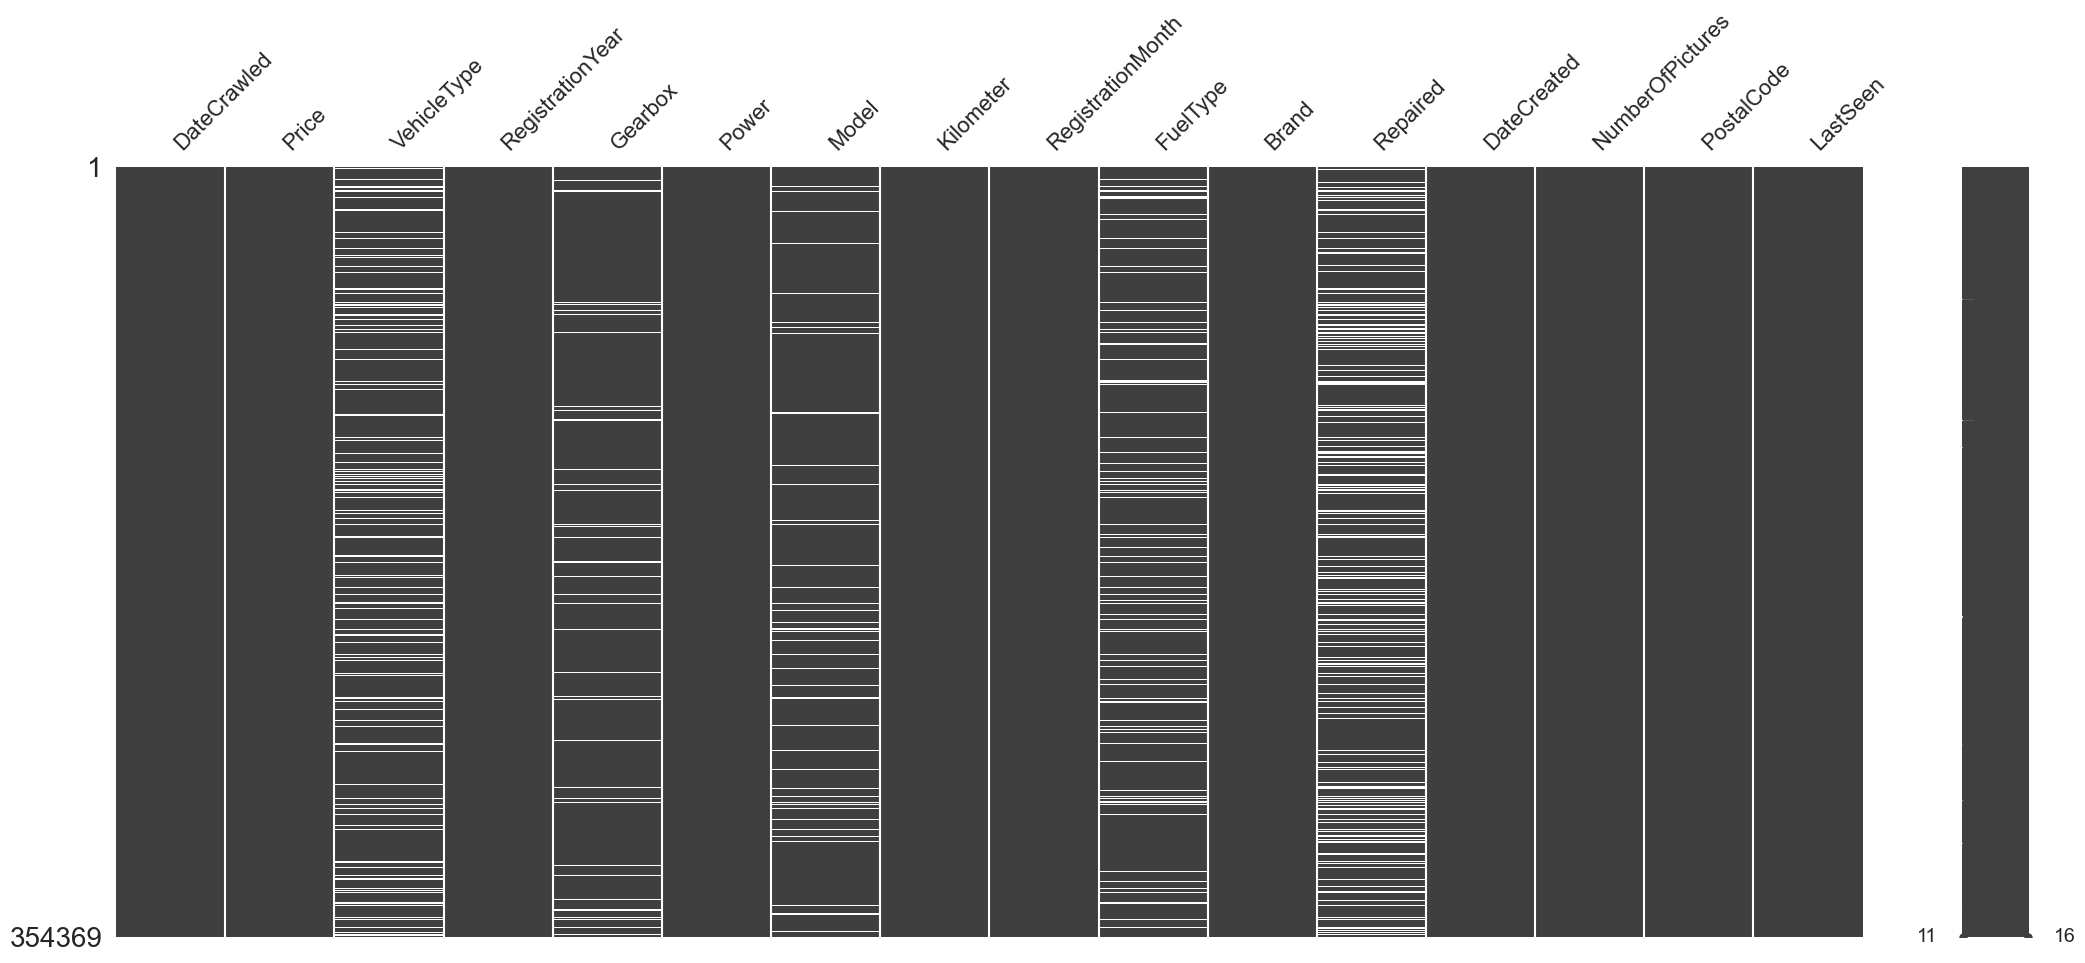

In [30]:
mn.missingno.matrix(df)

Некоторые колонки имеют много пустых данных. Учтем это.

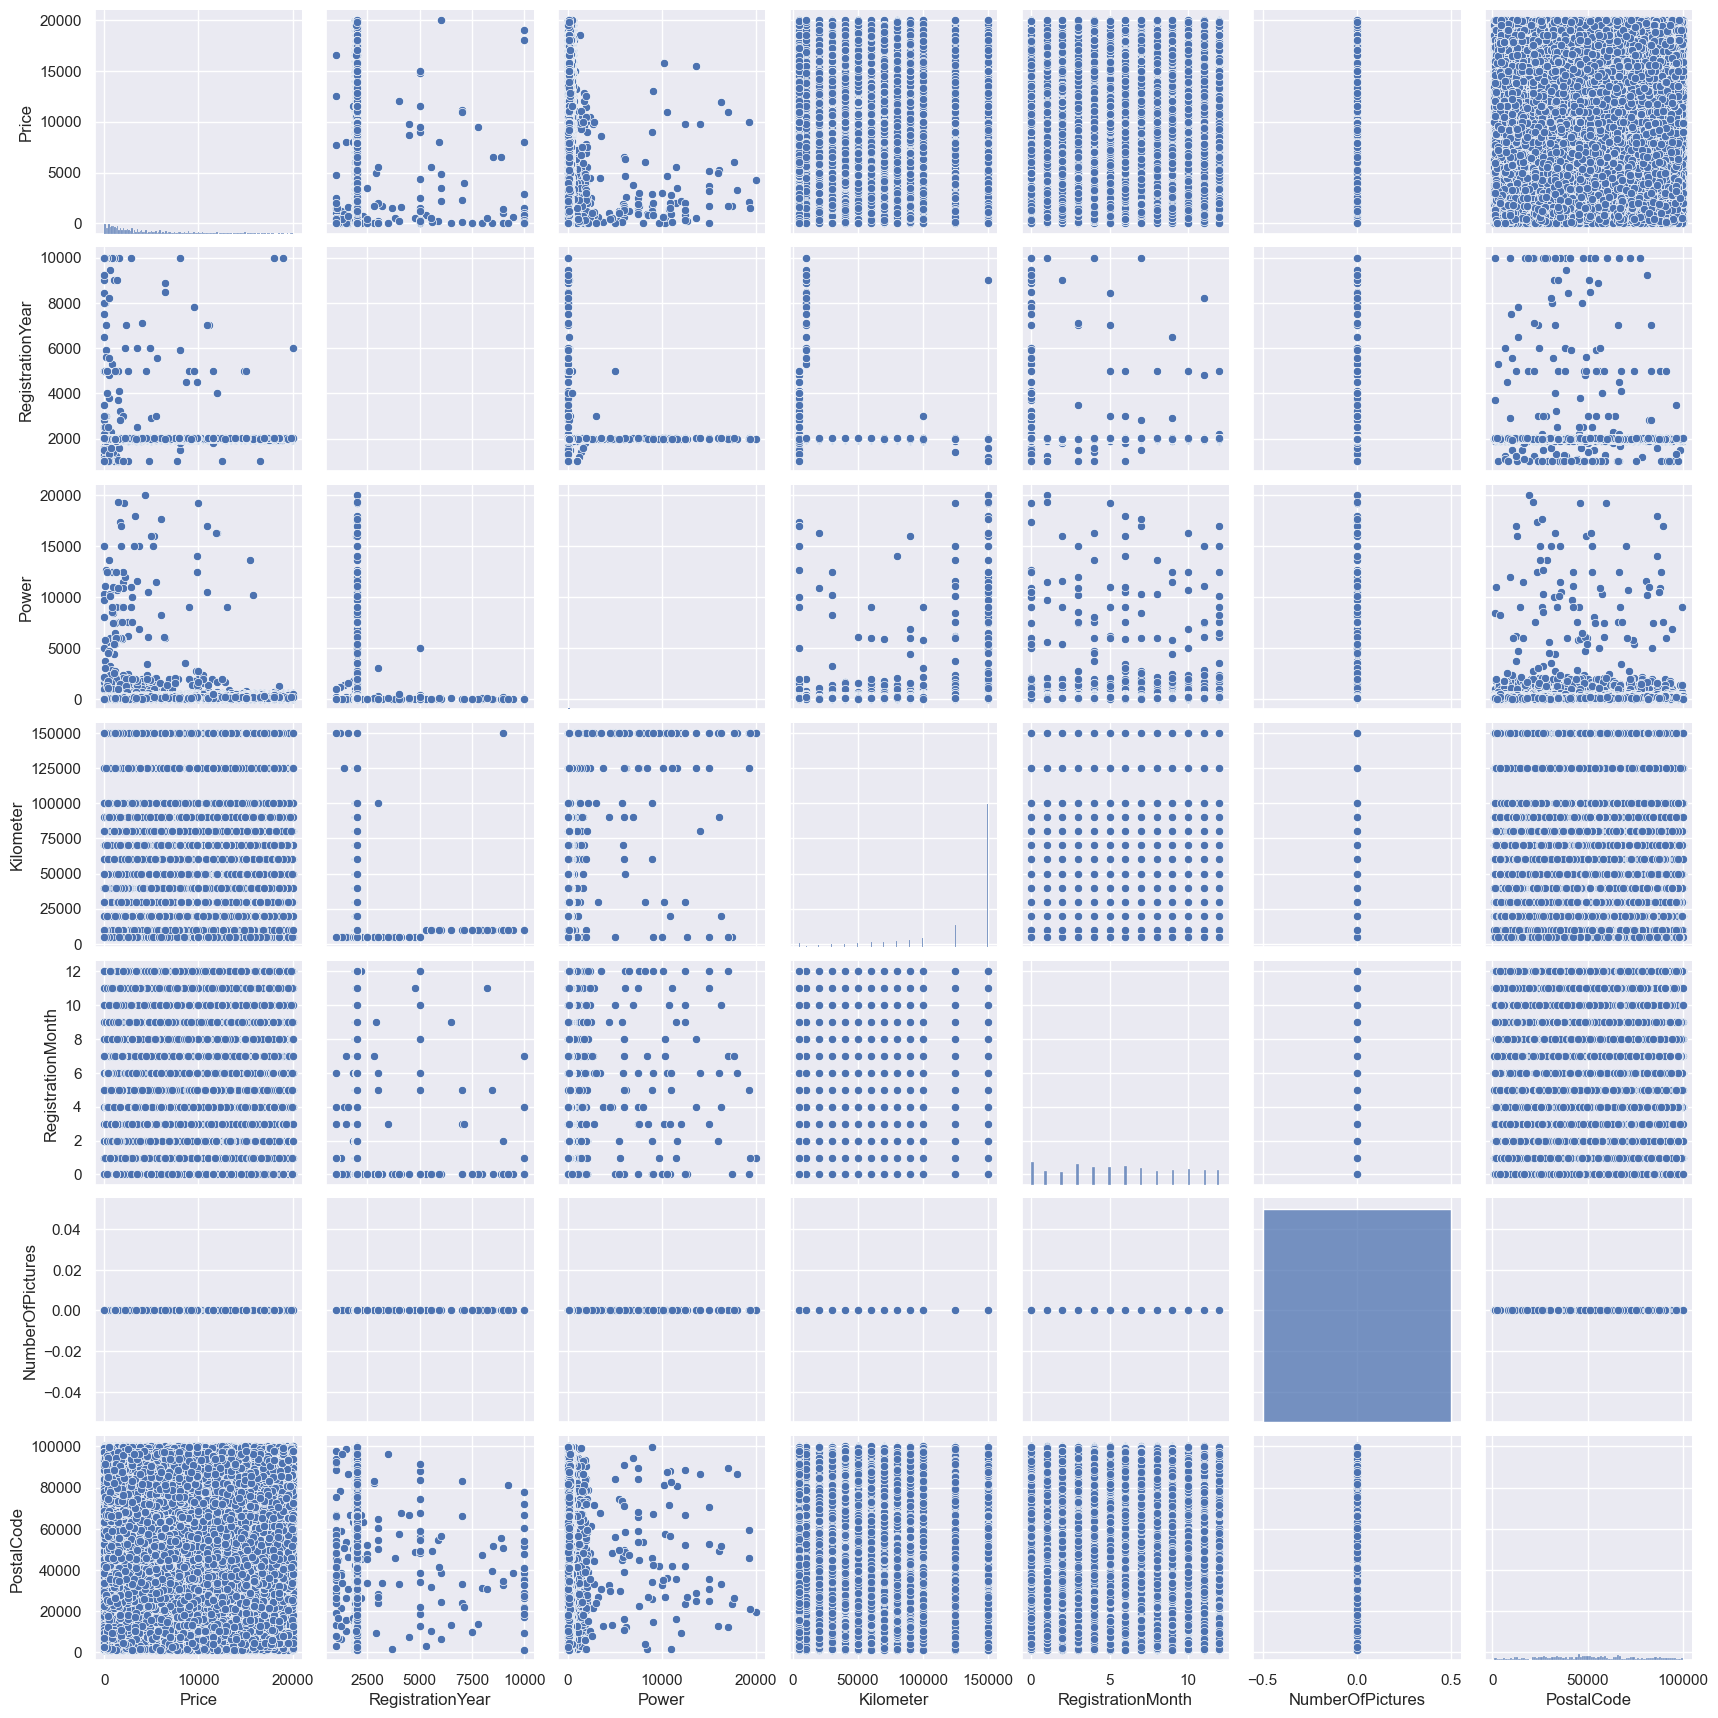

In [44]:
sns.pairplot(df)

Очень интересно, но ничего непонятно. Сами по себе пары параметров практически не имеют корреляция видимых глазу непрофессионала.

<Axes: >

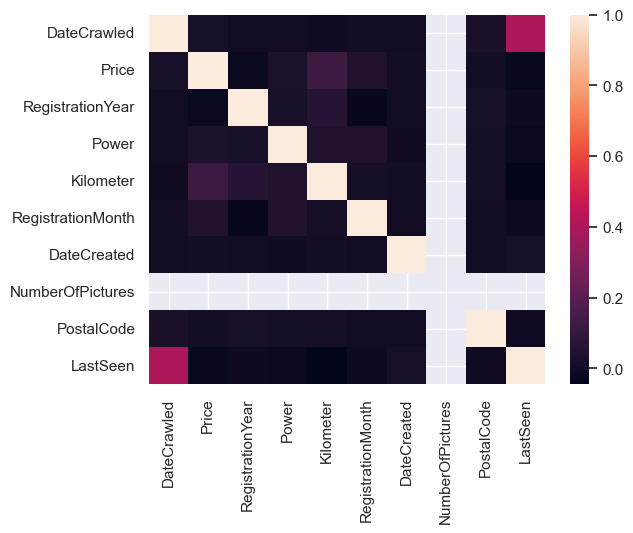

In [50]:
sns.heatmap(df.drop(columns=categorical_cols).apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1))
# sns.heatmap(df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1))

Аналогично парным графикам высокой корреляции не наблюдается.

Проверим входные данные на соответствие нормальным

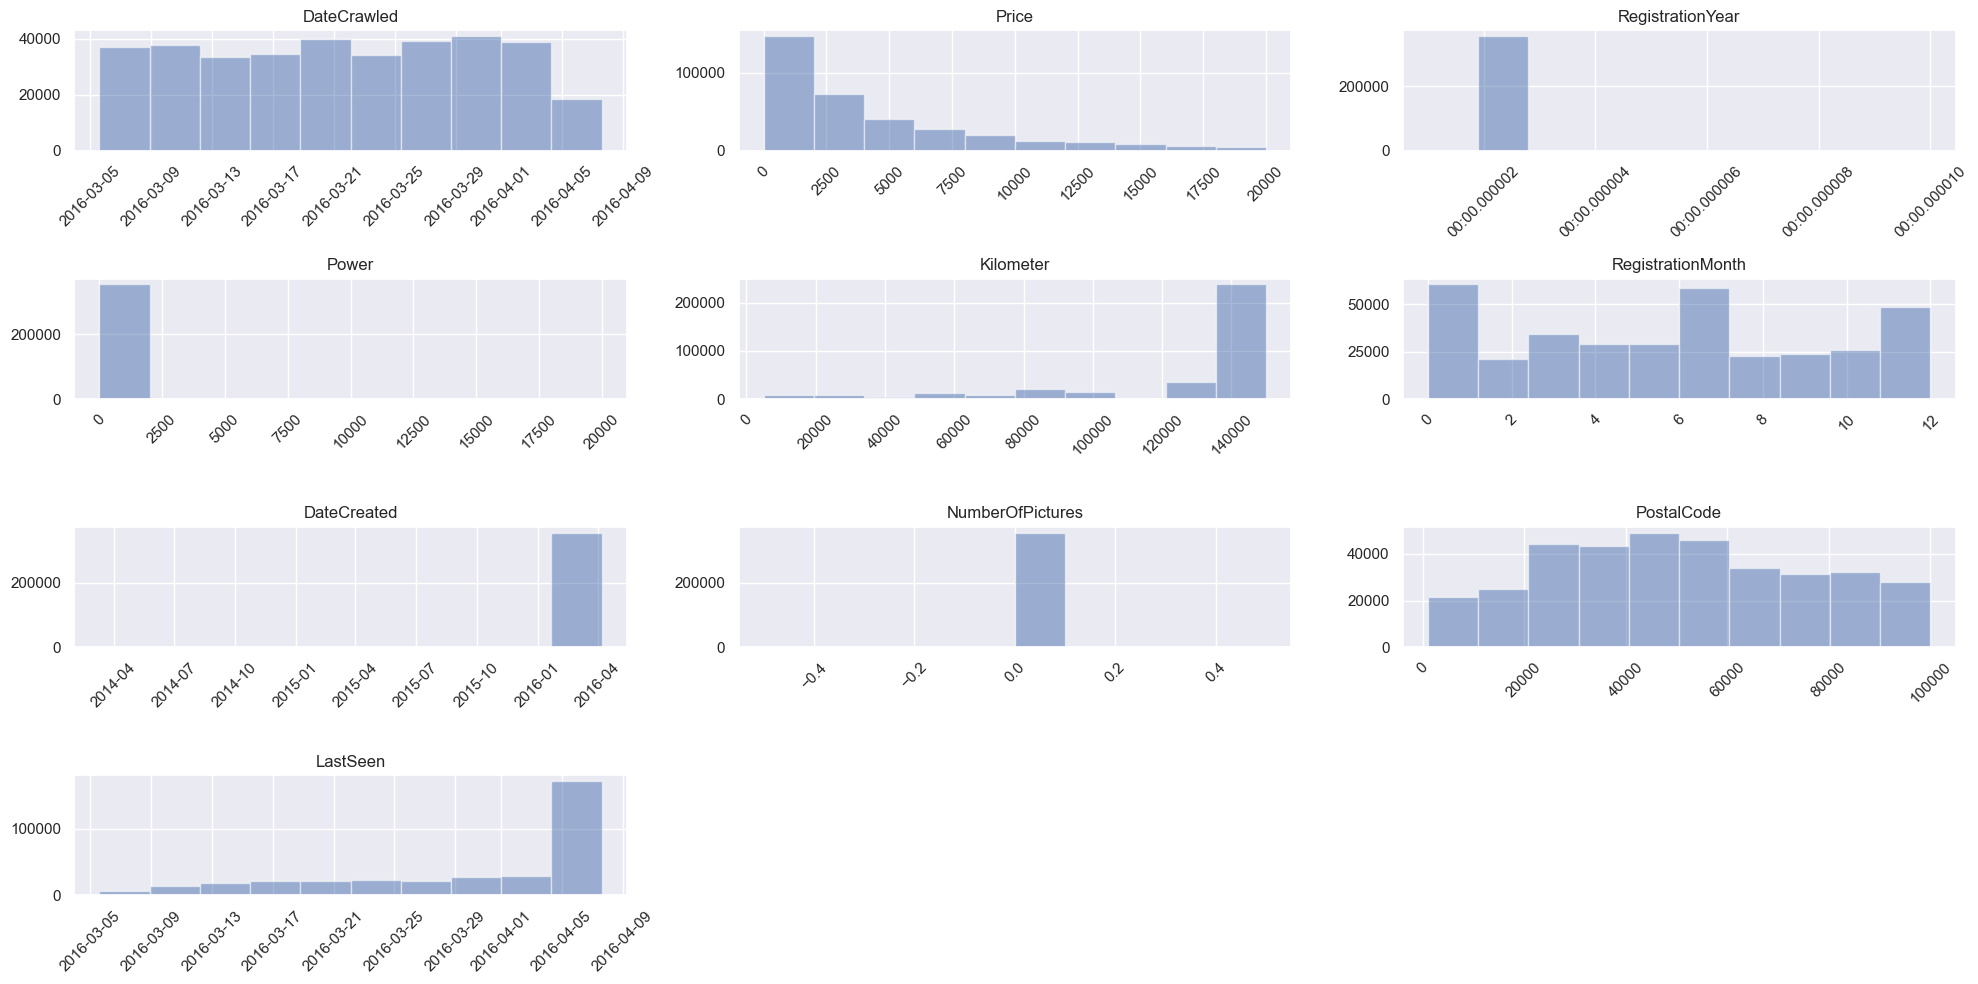

In [109]:
df.hist(alpha=0.5, figsize=(20, 10), xrot=45)
plt.tight_layout()
plt.show()


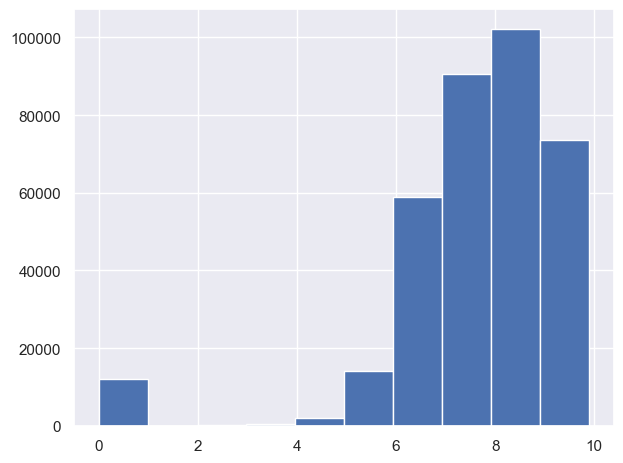

In [114]:
df["price_log"] = np.log1p(df["Price"])
df.price_log.hist()
plt.tight_layout()
plt.show()


Получилось не очень круто. Но, что имеем, то имеем. А что если убрать объявления с NaN в полях?

In [116]:
df = df.drop(columns=["price_log"])

Разбивка на выборки и разбивка подготовка гиперпараметров

Изменим тип дат на int64


In [15]:
df["DateCrawled"] = df["DateCrawled"].astype("int64")
df["DateCreated"] = df["DateCreated"].astype("int64")
df["LastSeen"] = df["LastSeen"].astype("int64")
df["RegistrationYear"] = df["RegistrationYear"].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354365 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   DateCrawled        354365 non-null  int64   
 1   Price              354365 non-null  int64   
 2   VehicleType        316875 non-null  category
 3   RegistrationYear   354365 non-null  int64   
 4   Gearbox            334532 non-null  category
 5   Power              354365 non-null  int64   
 6   Model              334660 non-null  category
 7   Kilometer          354365 non-null  int64   
 8   RegistrationMonth  354365 non-null  int64   
 9   FuelType           321470 non-null  category
 10  Brand              354365 non-null  category
 11  Repaired           283211 non-null  category
 12  DateCreated        354365 non-null  int64   
 13  NumberOfPictures   354365 non-null  int64   
 14  PostalCode         354365 non-null  int64   
 15  LastSeen           354365 non-null  int

Преобразуем категории в числовые значение

In [19]:
def category_to_dict(col: pd.Series):
    map_ = {}
    for count, category in enumerate(col.unique()):
        map_[category] = count

    return map_

In [20]:
categories_map = {}

In [21]:

for category in categorical_cols:
    map_ = category_to_dict(df[category])
    categories_map[category] = map_
    df[category] = df[category].map(map_)

In [22]:
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,1458820337000000000,480,0,1993,0,0,0,150000,0,0,0,0,1458777600000000000,0,70435,1459999017000000000
1,1458817125000000000,18300,1,2011,0,190,1,125000,5,1,1,1,1458777600000000000,0,66954,1459993610000000000
2,1457959941000000000,9800,2,2004,1,163,2,125000,8,1,2,0,1457913600000000000,0,90480,1459860466000000000
3,1458233644000000000,1500,3,2001,0,75,0,150000,6,0,0,2,1458172800000000000,0,91074,1458236417000000000
4,1459445120000000000,3600,3,2008,0,69,3,90000,7,1,3,2,1459382400000000000,0,60437,1459937841000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,1458553858000000000,0,0,2005,0,0,78,150000,7,0,23,1,1458518400000000000,0,2694,1458556969000000000
354365,1457977707000000000,2200,0,2005,2,0,1,20000,1,2,19,0,1457913600000000000,0,39576,1459903612000000000
354366,1457207781000000000,1199,5,2000,1,101,29,125000,3,0,17,2,1457136000000000000,0,26135,1457720232000000000
354367,1458413832000000000,9200,6,1996,0,102,21,150000,3,1,0,2,1458345600000000000,0,87439,1460013326000000000


In [23]:
y = df["Price"]
X = df.drop(columns=["Price"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=RANDOM_SEED)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.1, random_state=13)

params = {'n_estimators': 5,#00,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

Обучение бустинговой модели

In [24]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 19288275.5836


Визуализация результата работы модели

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(diabetes.feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

Логистическая регрессия

In [25]:
LR = LogisticRegression(random_state = RANDOM_SEED, max_iter= 10, tol=1e-5, solver = 'lbfgs' )
LR.fit(X_train, y_train)
prediction_valid_LR = LR.predict(X_valid)
accuracy_LR = accuracy_score(prediction_valid_LR, y_valid)

In [ ]:
mse = mean_squared_error(y_valid, prediction_valid_LR)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))